## Assignment Week 11 - Biswajit Sharma

Load the MNIST data set.

In [25]:
# import modules

import numpy as np
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.

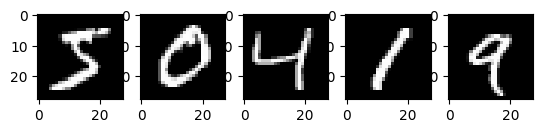

In [3]:
#plot the first image in the dataset
fig, ax = plt.subplots(nrows=1, ncols=5)
ax[0].imshow(X_train[0],cmap="gray")
ax[1].imshow(X_train[1],cmap="gray")
ax[2].imshow(X_train[2],cmap="gray")
ax[3].imshow(X_train[3],cmap="gray")
ax[4].imshow(X_train[4],cmap="gray")
plt.show()

In [44]:
# first five training labels
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

The training images matches the training lables.

Build and train a Keras CNN classifier on the MNIST training set.

In [4]:
##The book refers to Pytorch CNN classifier but assignment refers to keras, ask professor

In [5]:
# check the sahpe of train and test data
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

We see that the pixels are 28X28 with 60000 examples in training set and 10000 examples in test set

In [6]:
# reshape dataset to have a single channel
train_X = X_train.reshape((X_train.shape[0], 28, 28, 1))
test_X = X_test.reshape((X_test.shape[0], 28, 28, 1))

There are 10 classes each for one digit from 0-9. We can perform one hot encoding to convert the target to categorical

In [7]:
#using to_categorical function to conveert to categorical
train_y = to_categorical(y_train)
test_y = to_categorical(y_test)

In [ ]:
#scale the pixel values between 0-255
# train_y = train_y.astype("float")
# test_y = test_y.astype("float")

# train_y = train_y/255.0
# test_y = test_y/255.0

In [8]:
#define model
model = Sequential()

# add convolution layers layers with 32 nodels and 3X3 filters
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
# add mpooling layer
# model.add(MaxPooling2D((2,2)))
# add flattenting layer before connected layers
model.add(Flatten())
# add connected layers
# model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation="softmax"))

C:\Users\babub\Documents\python\pydata-book\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#compile model with optimizer and loss function
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
#train the model
model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 27ms/step - accuracy: 0.9189 - loss: 0.5738 - val_accuracy: 0.9738 - val_loss: 0.0903
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9809 - loss: 0.0634 - val_accuracy: 0.9772 - val_loss: 0.0782
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9883 - loss: 0.0391 - val_accuracy: 0.9780 - val_loss: 0.0783


Report the test accuracy of your model.

In [23]:
# predict the digits using trained model
predicted = model.predict(test_X).round()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [24]:
accuracy_score(test_y,predicted)

0.977

Display a confusion matrix on the test set classifications.

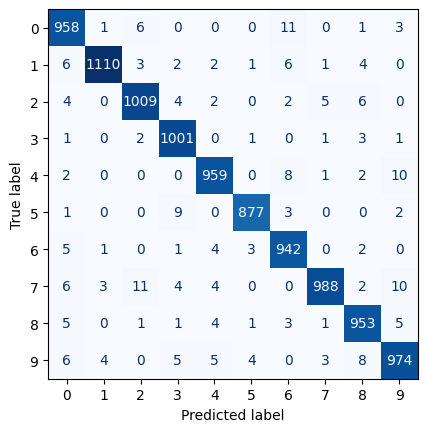

In [43]:
ConfusionMatrixDisplay.from_predictions(test_y.argmax(axis=1),predicted.argmax(axis=1),
                      colorbar=False,
                      cmap="Blues")
plt.show()

### Summary